In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os
import re
import os.path
from os import path

In [74]:
# class MeasurementPair:
#     def __init__(self, y, up, down):
#         self.y = y
#    }     self.up = up
#         self.down = down

# class FullMeasurement:
#     def __init__(self, y, )

def extract_By(file):
    with open(file) as f:
        text = f.read()
        
        match = re.search(r'# Param: By=([0-9.]+)', text)
        assert(match)
        return float(match.group(1))
    
import os
dirs = next(os.walk('data'))[1]
print(dirs)

def get_data(i):
    y, I_up = np.genfromtxt(f'data/up/{i}/det.dat', delimiter=' ', usecols=(0,1), unpack=True)
    _, I_down = np.genfromtxt(f'data/down/{i}/det.dat', delimiter=' ', usecols=(0,1), unpack=True)
    _, I_empty_up = np.genfromtxt(f'data/empty_up/{i}/det.dat', delimiter=' ', usecols=(0,1), unpack=True)
    _, I_empty_down = np.genfromtxt(f'data/empty_down/{i}/det.dat', delimiter=' ', usecols=(0,1), unpack=True)
    By = extract_By(f'data/up/{i}/det.dat')
    return y, I_up, I_down, I_empty_up, I_empty_down, By

['empty_up', 'down', 'up', 'empty_down']


Measurement 1; By = 0.0232311


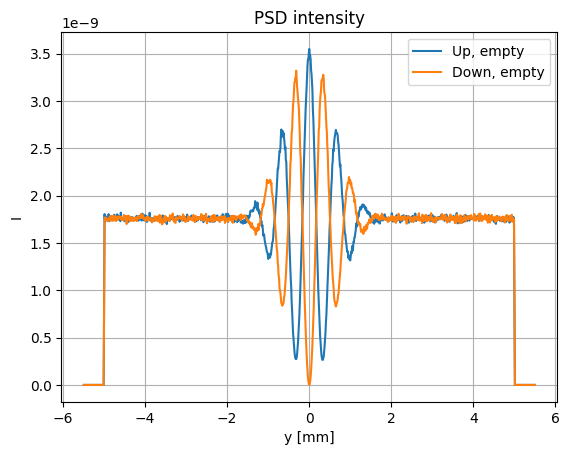

In [75]:
i = 1

y, I_up, I_down, I_empty_up, I_empty_down, By = get_data(i)
print(f"Measurement {i}; By = {By}")
y*=1e1  

plt.plot(y, I_empty_up,'-',  label='Up, empty')
plt.plot(y, I_empty_down, label='Down, empty')
plt.xlabel('y [mm]')
plt.ylabel('I')
plt.title('PSD intensity')
plt.grid()
plt.legend()
plt.show()

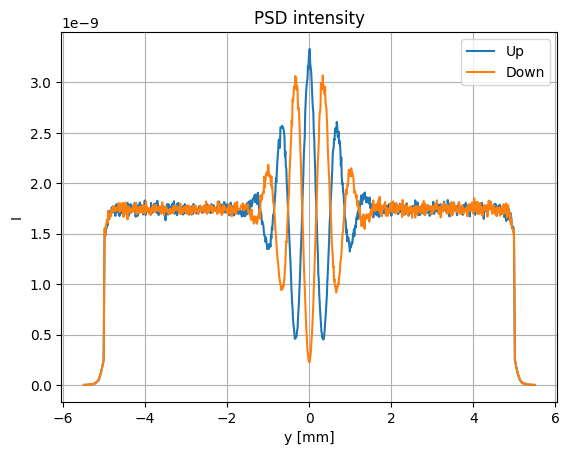

In [81]:
plt.plot(y, I_up,'-',  label='Up')
plt.plot(y, I_down, label='Down')
plt.xlabel('y [mm]')
plt.ylabel('I')
plt.title('PSD intensity')
plt.grid()
plt.legend()
plt.show()

In [82]:
def indices_within_range(x, a, b):
    return np.where((x >= a) & (x <= b))[0]

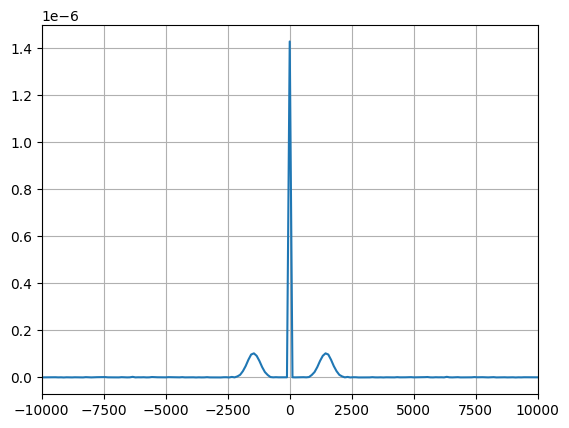

In [92]:
import numpy.fft as fft
def plot_spectra(Is):
    indices = indices_within_range(y, -4.5, 4.5)
    N = len(indices)
    d = (y[1] - y[0])*1e-3
    f = fft.fftshift(fft.fftfreq(N, d=d))
    for I in Is:
        I_spectrum = fft.fftshift(np.abs(fft.fft(I[indices])))
        plt.plot(f,I_spectrum)
    f_max = 10000
    plt.xlim((-f_max,f_max))
    plt.grid()
    plt.show()
plot_spectra([I_up])

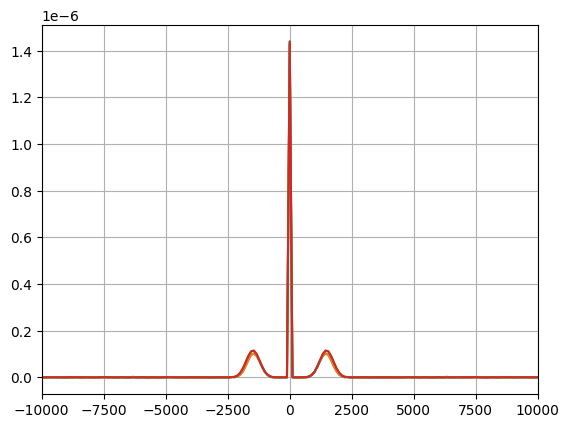

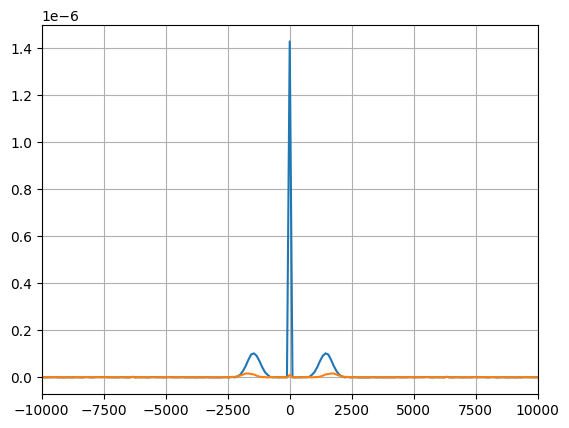

In [95]:

plot_spectra([I_up, I_down, I_empty_up, I_empty_down])
plot_spectra([I_up,I_up - I_empty_up])

In [ ]:
def compute_P_dark_field(I_up,I_down):
    return  (I_up - I_down) / (I_up + I_down)

P_s = compute_P_dark_field(I_up,I_down)
P_b = compute_P_dark_field(I_empty_up,I_empty_down)

plt.plot(y, P_s,'-',  label='Sample, analyzer')
plt.plot(y,P_b, label='No sample, analyzer')
plt.xlabel('y [mm]')

plt.ylabel('P')
plt.title('PSD intensity')
plt.grid()
plt.legend()
plt.show()